## Assignment 4
__Students:__

1. 21010294 - Duong Doan Tung
2. 21012745 - Pham Van Cong
3. 20111004 - Le Hoang Nam

__Programming language used:__  Python

__Programming environment used:__  Jupyter Notebook

---

Run the following cell to import the required libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import random

---
# UNFINISHED VERSION!!
# DO NOT SHARE THIS VERSION WITH OTHERS UNDERANY CIRCUMSTANCES!!
---

#### Part 1

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.001s...
[t-SNE] Computed neighbors for 100 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 2.115542
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.816032
[t-SNE] KL divergence after 850 iterations: 0.602202


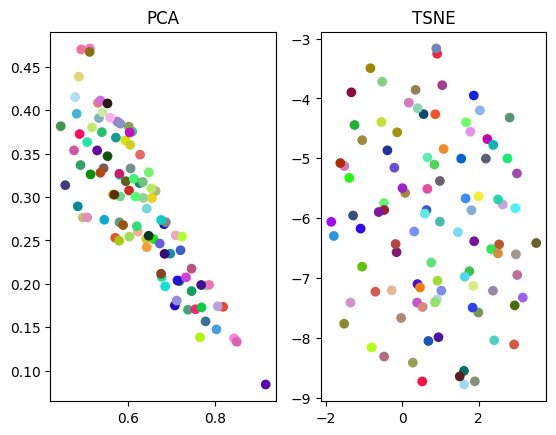

In [5]:

#a)
def PlotPCA(X):
    X_pca = None
    for i in range(X.shape[0]):
        pca = PCA(n_components=2)
        Xi = X[i, :]
        pca.fit(Xi)
        if not X_pca is None:
            X_pca = np.vstack((X_pca, pca.explained_variance_ratio_))
        else:
            X_pca = pca.explained_variance_ratio_
    return X_pca

X = np.random.uniform(2,5,(100,4,5))
X_pca = PlotPCA(X)
#random color map
subplot = plt.subplot(1,2,1)

subplot.set_title("PCA")
subplot.scatter(X_pca[:,0], X_pca[:,1], c=np.random.rand(100,3))
def PlotTSNE(X):
    X_TNSE = None
    tnse = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=10000)
    X_TNSE = tnse.fit_transform(X)
    return X_TNSE
X = np.random.uniform(2,5,(100,4,5)).reshape(100,20)
X_TNSE = PlotTSNE(X)
subplot = plt.subplot(1,2,2)
subplot.set_title("TSNE")
subplot.scatter(X_TNSE[:,0], X_TNSE[:,1], c=np.random.rand(100,3))

plt.show()


    




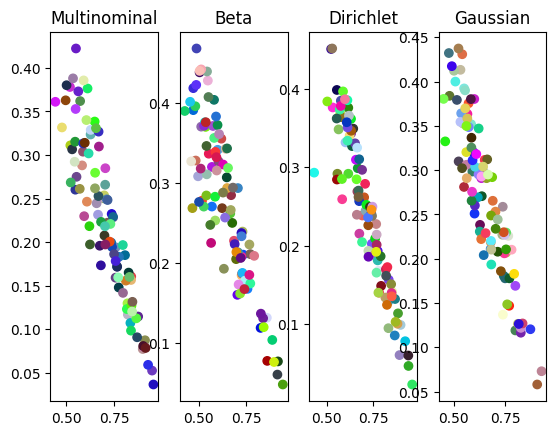

In [9]:
#b) 

#X_multinominal with size (100,4,5) with multinominal distribution with 6 classes
X_multinominal = np.random.multinomial(100, [1/6]*5, size=(100,4))
X_multinominal_pca = PlotPCA(X_multinominal)
subplot = plt.subplot(1,4,1)
subplot.set_title("Multinominal")
subplot.scatter(X_multinominal_pca[:,0], X_multinominal_pca[:,1], c=np.random.rand(100,3))

#X_beta
X_beta = np.random.beta(1, 1, size=(100,4,5))
X_beta_pca = PlotPCA(X_beta)
subplot = plt.subplot(1,4,2)
subplot.set_title("Beta")
subplot.scatter(X_beta_pca[:,0], X_beta_pca[:,1], c=np.random.rand(100,3))

#X_Dirichlet
X_Dirichlet = np.random.dirichlet((1, 1, 1, 1, 1), size=(100,4))
X_Dirichlet_pca = PlotPCA(X_Dirichlet)
subplot = plt.subplot(1,4,3)
subplot.set_title("Dirichlet")
subplot.scatter(X_Dirichlet_pca[:,0], X_Dirichlet_pca[:,1], c=np.random.rand(100,3))

#X_Gaussian
X_Gaussian = np.random.normal(0, 1, size=(100,4,5))
X_Gaussian_pca = PlotPCA(X_Gaussian)
subplot = plt.subplot(1,4,4)
subplot.set_title("Gaussian")
subplot.scatter(X_Gaussian_pca[:,0], X_Gaussian_pca[:,1], c=np.random.rand(100,3))

plt.show()


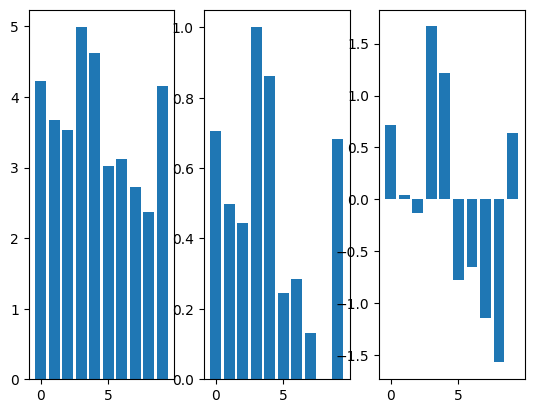

In [56]:
def min_max_norm(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
def z_score_norm(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

X = np.random.uniform(2,5,(10))
X_norm_1 = min_max_norm(X)
X_norm_2 = z_score_norm(X)
plt.subplot(1,3,1)
plt.bar(np.arange(10), X)
plt.subplot(1,3,2)
plt.bar(np.arange(10), X_norm_1)
plt.subplot(1,3,3)
plt.bar(np.arange(10), X_norm_2)
plt.show()

#### Part 2

[[ 1 -1 -1 -1 -1  1  1  1  1 -1]]
[[ 1  1 -1  1 -1  1  1  1  1 -1]
 [-1  1 -1 -1 -1 -1  1 -1  1  1]
 [-1  1 -1  1 -1 -1 -1 -1 -1 -1]]
[[5 3 6 2 4 6 3 3 5 1]
 [1 1 2 1 3 4 6 5 3 4]]


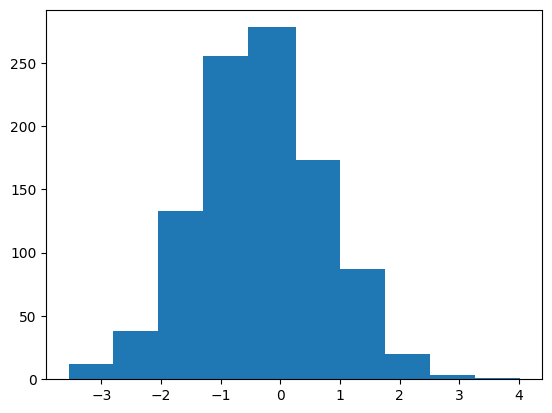

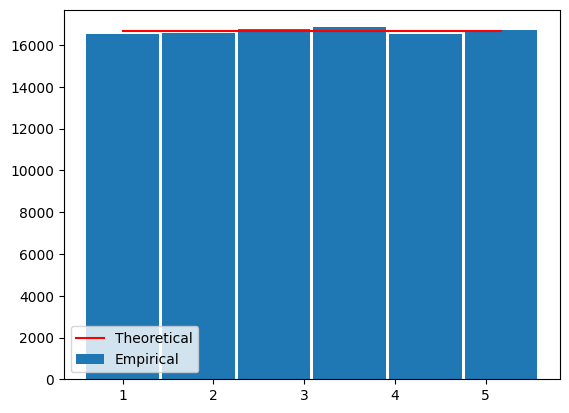

In [10]:
# c)
def flip_coins(step,p,n = 1):
    X = np.random.choice([-1,1], size=(n,step), p=[1-p,p])
    return X

#flip single coin 10 times
X = flip_coins(10,0.5)
print(X)

#flip 3 coins 10 times
X = flip_coins(10,0.5,3)
print(X)

# d)
def roll_dices(dices = 1,t = 1,faces = 6 ):
    return np.random.choice([i for i in range(1,faces+1)], size=(dices,t))
X1 = roll_dices(2,10)
print(X1)

# e)
def histogram(X,g = 6):
    hist = np.histogram(X,g)
    return hist
X = np.random.normal(0, 1, size=(1000))
hist = histogram(X,10)
plt.bar(hist[1][:-1], hist[0])
plt.show()

# f)

rolled_dices = roll_dices(1,100000)

hist = histogram(rolled_dices,6)
plt.bar(hist[1][:-1], hist[0])
plt.plot([hist[1][:-1].min(),hist[1][:-1].max()],[100000/6,100000/6],c='r')
#add legend
plt.legend(['Theoretical','Empirical'])

plt.show()





#### Part 3

Problem 1

#### Part 5


In [3]:
# A)

import numpy.random as npr

npr.seed(1)

# B) 
X = npr.binomial(1,0.35,1000)
Y = np.sum(X)
X_mean = np.mean(X)
X_variance = np.sum(X - X_mean) **2/(X.shape[0] - 1)

print(f"Y: \n{Y}\n X_mean: \n{X_mean}\n X_variance: \n{X_variance}")


Y: 
348
 X_mean: 
0.348
 X_variance: 
2.1352151028204362e-30


(10000,)


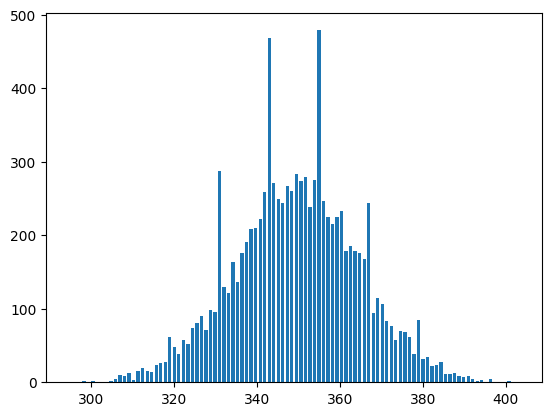

In [11]:
# C)

X = npr.binomial(1,0.35,(1000,10000))
Y = np.sum(X,axis=0)
print(Y.shape)

# D)
#call histogram function
hist = histogram(Y,100)
plt.bar(hist[1][:-1], hist[0])
plt.show()


In [14]:
# E)


X_mean = np.mean(X,axis=0)
X_variance = np.sum(X - X_mean) **2/(X.shape[0] - 1)

print(f"X_mean: \n{X_mean}\n X_variance: \n{X_variance}")

X_mean: 
[0.338 0.355 0.333 ... 0.336 0.336 0.353]
 X_variance: 
2.428465999880515e-24


In [15]:
# F)

X = npr.uniform(-1,1,1000)

X_mean = np.mean(X)
X_variance = np.sum(X - X_mean) **2/(X.shape[0] - 1)

print(f"X_mean: \n{X_mean}\n X_variance: \n{X_variance}")

X_mean: 
0.008389010490672045
 X_variance: 
7.588541841014938e-31


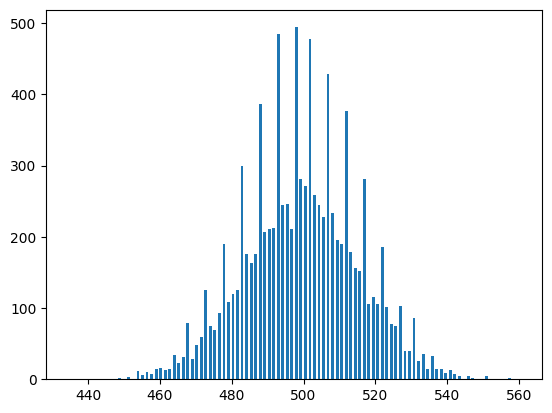

In [34]:
# G)

X = npr.rand(1000,10000)
X = (X > 0.5).astype(int)
Y = np.sum(X,axis=0)

# H)
hist = histogram(Y,100)
plt.bar(hist[1][:-1], hist[0])
plt.show()

In [36]:
# I)
F_mean = X_mean
F_variance = X_variance

X_mean = np.mean(X,axis=0)
X_variance = np.sum(X - X_mean) **2/(X.shape[0] - 1)

#print comparison
print(f"X_mean: \n{X_mean}\n X_variance: \n{X_variance}\n F_mean: \n{F_mean}\n F_variance: \n{F_variance}")

X_mean: 
500.1006
 X_variance: 
2.4985050951024424e+16
 F_mean: 
[0.49  0.518 0.483 ... 0.473 0.489 0.492]
 F_variance: 
1.7352648033089172e-25
